# Homework 3


Please follow the guidelines in Sec ***9. Homework Projects*** of the Syllabus. 

Homework projects must be submitted via Canvas as a *working* Jupyter notebook.

## Question 1


The following [Poisson's equation](https://en.wikipedia.org/wiki/Poisson%27s_equation) in 1D
$$
    \frac{d^2}{dx^2} \phi(x) = 2\exp(-x^2),
$$
has the exact solution
$$
    \phi(x) = \sqrt{\pi}\, {\rm erf}\, (x) x + \exp(-x^2) + C_1 x + C_2,
$$
where ${\rm erf}$ is [the error function](http://dlmf.nist.gov/7.2.i) implemented in the library [SpecialFunctions.jl](https://specialfunctions.juliamath.org/v0.1/), $C_1$ and $C_2$ are arbitrary constants. 


1) Numerically solve this inhomogenious Laplace's equation by using the central finite-difference method.
2) What values of the constants $C_1$ and $C_2$ should be chosen so that the obtained numerical solutions closely overlaps (on the plot) with the exact solution?


**Note:**

In Julia, to find the unknown vector $x$ in the linear system of equations $Ax = y$, we use the command `A \ y`.

Consider the following example: Let's say the matrix $A$ is defied as

Let's say the known vector $y$ reads as

Then, the unknown $x$ is 

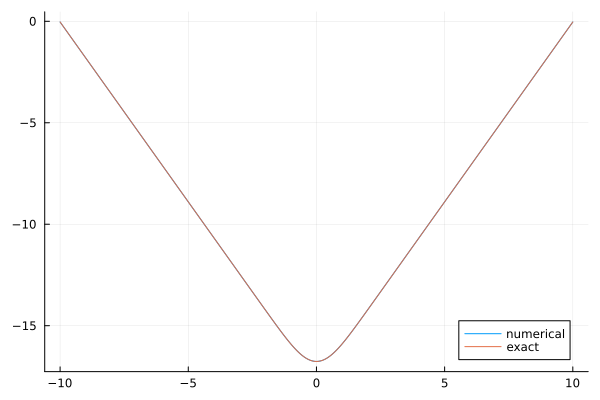

17.759993488345913

In [61]:
using LinearAlgebra, Plots, SpecialFunctions,Statistics
x=collect(-10:.02:10)
Δx=.02
N=length(x)
B = 2 .*exp.(-x.^2)
A = zeros(N,N)
for i in 1:N, j in 1:N
  abs(i-j)<=1 && (A[i,j]+=1)
  i==j && (A[i,j]-=3)
end
A = A/(Δx^2)
numerical_sol=A\B
#
exact_fun=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2)
exact_sol=exact_fun(x)
diff=exact_sol-numerical_sol
c2=mean(diff)
c1=0
exact_fun=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2) +c1 .*x  .-c2
exact_sol=exact_fun(x)
#
pt1=Plots.plot(x,numerical_sol,label="numerical")
Plots.plot!(pt1,x,exact_sol,label="exact")
##
print(c2)
display(pt1)






## Question 2

In [class](https://wavetulane-my.sharepoint.com/:o:/g/personal/dbondar_tulane_edu/EjZjkvTFp4tNrthBttdxEJQBwxTUBJotcnkl_vWWOoY_XA?e=AjzyDr), using the central finite difference approximation, we have derived the matrix representation of the time independent Schrödinger equation with the boundary conditions that the wave function vanishes outside of the coordinate grid, i.e., $\psi(x_{0}) = \psi(x_{N+1}) = 0$.

Derive the matrix representation of the time independent Schrödinger equation with the periodic boundary condition, i.e., $\psi(a) = \psi(b)$ and $\psi'(a) = \psi'(b)$.

**Note**

The first condition is discretized as 
$$
  \psi(a) = \psi(b) \Longrightarrow \psi(x_0) = \psi(x_N).
$$

Whereas, the second condition is discretized as 
$$
    \psi'(a) = \psi'(b) \Longrightarrow
$$

$$
    \frac{\psi(x_1) - \psi(x_0)}{\Delta x} = \frac{\psi(x_{N+1}) - \psi(x_{N})}{\Delta x}
    \Longrightarrow
$$
$$
    \psi(x_1) - \psi(x_N) = \psi(x_{N+1}) - \psi(x_{N})
    \Longrightarrow
$$
$$
    \psi(x_1) = \psi(x_{N+1}).
$$

## Question 3

Using the derived matrix in the previous question, numerically find the eigenenergies of the Schrödinger equation for a particle in the box with the periodic boundary condition and $a=0$ and $b=1$. 

By plotting, compare the numerically obtained result with the exact energies $E_n = 2 (\pi n)^2$, where $n=0, \pm 1, \pm 2, \pm 3, \ldots$.

**Note** that for the periodic boundary conditions, the coordinate grid needs to be chosen differently that for the particle-in-the-box case (i.e., not like `range(a, b, N)`). The accurate choice is

$$
    x_m = a + (m - 1)(b - a) / N, \qquad m =1,2, \ldots N.
$$
Note that $x_N < b$! Ask me (Denys Bondar) if you want to know why exactly it should be done this way.

## Question 4: extra credit for 3170, required for 6170

In condensed matter physics, electronic properties of crystals are modeled by solving the time-independent Schrödinger equation with a periodic potential. According to the 1D version of [the Bloch’s theorem](https://en.wikipedia.org/wiki/Bloch%27s_theorem), the solution $\psi(x)$ of the Schrödinger equation for a periodic potential $U(x + L) = U(x)$ is of the form
$$
\psi(x) = e^{ikx} u(x),
$$
where $u(x + L) = u(x)$ is a periodic function and the real parameter $k$ is called the crystal momentum vector.

If this form for $\psi(x)$ is substituted back into the Schrödinger equation, we obtain (see [the derivation here](https://en.wikipedia.org/wiki/Bloch%27s_theorem)):
$$
 \left[\frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 + U(x) \right] u_n(x) = E_n(k) u_n(x).
$$
Note that $k$ became just a real parameter. 

In other words, to find the electronic bands $E_n(k)$, where $n$ is known as the band index and $-\pi / L \leq k \leq\pi / L$ (this range of $k$ is known as the first Brillouin zone in 1D), we need to find the eigenenergies  for the following Schrödinger equation with the periodic boundary condition

$$
 \left[-\frac{1}{2}\frac{d^2}{dx^2} -ik\frac{d}{dx}  + \frac{k^2}{2} + U(x) \right] u_n(x) = E_n(k) u_n(x).
 \qquad\qquad \mbox{(1)}
$$

Your task is to use the central finite difference method to calculate $E_n(k)$ as a function of $k$ for $n=1$ and $n=2$. $U(x)=\cos(x)$, $0 \leq x < L$, and $L=2\pi$. Plot  these $E_{1,2}(k)$.

**Hint**: For every value of $k$ in the interval $[-\pi/L, \pi/L]$ you need to find the first two eigenvalues of equation (1). Also recall that

$$
[ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right)
$$
$$
\Longrightarrow \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x} = f'(x) + O\left( \Delta x^2 \right).
$$

## Question 5: extra credit for 3170, required for 6170

Using the same system as in Question 4, we will seek the numerical solution of equation (1) by expanding the unknown eigenfunction $u(x)$ (we drop the band index $n$ for convenience) into the following basis
$$
u(x) = \sum_{q=-\infty}^{\infty} a_q f_q(x), \qquad f_q(x) = \frac{\exp(ixq)}{\sqrt{2\pi}}.
 \qquad\qquad \mbox{(2)}
$$
This representation is known as [the Fourier series](https://en.wikipedia.org/wiki/Fourier_series). It is very easy to see that for such a representation  the function $u(x)$ is indeed periodic $u(x + L) = u(x)$ with the period $L=2\pi$. 


Note that the orthogonality condition for the basis $\{f_q(x)\}$ reads
$$
    \int_0^{2\pi} f_m(x)^* f_q(x) dx = \delta_{m, q},
$$
where $\delta_{m, q}$ is [the Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta).

Following the logic of [in-class derivation](https://wavetulane-my.sharepoint.com/:o:/g/personal/dbondar_tulane_edu/EjZjkvTFp4tNrthBttdxEJQBwxTUBJotcnkl_vWWOoY_XA?e=AjzyDr), derive the ***analytical*** expression for the matrix representation of the Hamiltonian in equation (1).

**Hint:**
$$
    KE_{m,q} = \int_0^{2\pi} f_m(x)^* \left(-\frac{1}{2}\frac{d^2}{dx^2} -ik\frac{d}{dx}  + \frac{k^2}{2} \right) f_q(x) dx.
$$

$$
    PE_{m,q} = \int_0^{2\pi} f_m(x)^* \cos(x) f_q(x) dx.
$$
The latter integral is very easy to calculate analytically by expressing $\cos$ though $\exp$.

## Question 6: extra credit for 3170, required for 6170

Using the matrix representation of the Hamiltonian obtain in the previous question, numerically calculate the electronic bands $E_{1,2}(k)$. Make a plot of $E_1(k)$ and the first band calculated via the finite difference in Question 4. Also plot of $E_2(k)$ and the second band calculated via the finite difference in Question 4.

**Hint:** To get a finite matrix, we need to truncate the series (2) as 
$$
u(x) = \sum_{q=-N}^{N} a_q f_q(x).
$$

The results obtained via this basis expansion method and central finite difference (Question 4) should coincide if calculations are converged.